In [1]:
import numpy as np
import cv2
import matplotlib
%matplotlib notebook
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import warnings
from PIL import Image

inp_img = cv2.imread('img.jpg')

plt.imshow(inp_img)
#plt.show()
#To mark two points of object in image for which height is given 
obj1 = plt.ginput(2)
obj1_a = obj1[0]
obj1_b = obj1[1]

plt.close()

print(obj1)

[(1038.9800540425226, 2063.6649719121096), (1042.6208134821873, 2200.1934508995237)]


In [2]:
plt.imshow(inp_img)

#Mark points of object for which height is to be found
obj2 = plt.ginput(2)
obj2_a = obj2[0]
obj2_b = obj2[1]

plt.close()

print(obj2)

[(1208.2753679869156, 915.0053686980018), (1195.5327099480905, 2030.8981369551304)]


In [3]:
pt_v = []
def find_van_pts(p,l):
    l = len(p)
    p_a = p[0]
    p_b = p[1]
    p_c = p[2]
    p_d = p[3]
    m = []
    pt_v.append(p_a)
    pt_v.append(p_b)
    pt_v.append(p_c)
    pt_v.append(p_d)
    m.append((p[1][1]-p[0][1])/(p[1][0]-p[0][0]))
    m.append((p[3][1]-p[2][1])/(p[3][0]-p[2][0]))
    c = []
    c.append(p[0][1]-(m[0]*p[0][0]))
    c.append(p[2][1]-(m[1]*p[2][0]))
    if(m[0] == m[1]):
        print("Infinite Vanishing point as lines are parallel")
        return None
    else:
        p_x = (c[0]-c[1])/(m[1]-m[0])
        p_y = (m[0]*p_x)+c[0]
        return ((p_x,p_y))
        
    print(l)
van_pt = []
for i in range(0,2):
    j = i+1
    print("Mark points for calculating vanishing point - ",j)
    plt.imshow(inp_img)
    p = plt.ginput(4)
    pt = find_van_pts(p,len(p))
    van_pt.append(pt)
    print(pt)
    #plt.plot([pt[0], pt[1]], marker = 'o')
    #plt.show()
    plt.close()

Mark points for calculating vanishing point -  1
(-579.6932232703252, 1184.7842482501428)
Mark points for calculating vanishing point -  2
(2544.0344867954823, 1041.3663609575724)


In [4]:
#print(van_pt[0])
#print(van_pt[1])
#print(van_pt[0][0])
#print(van_pt[0][1])
#print(van_pt[1][0])
#print(van_pt[1][1])
#plt.plot([van_pt[0][0], van_pt[1][0]], [van_pt[0][1], van_pt[1][1]], marker = 'o')
plt.close()
#Vanishing line
van_pt_m = (van_pt[1][1]-van_pt[0][1])/(van_pt[1][0]-van_pt[0][0])
van_pt_c = van_pt[1][1]-(van_pt_m*van_pt[1][0])
print("Slope of vanishing line : ",van_pt_m)
print("Intercept of vanishing line : ",van_pt_c)
print("Vanishing line equation in slope-intercept form : y = "+str(van_pt_m)+"x+"+str(van_pt_c))

Slope of vanishing line :  -0.04591241638329258
Intercept of vanishing line :  1158.1691316087827
Vanishing line equation in slope-intercept form : y = -0.04591241638329258x+1158.1691316087827


In [5]:
#Line between obj1 and obj2

obj_m = (obj2_b[1]-obj1_b[1])/(obj2_b[0]-obj1_b[0])
obj_c = obj2_b[1]-(obj_m*obj2_b[0])

print("Equation of line between objects : y = "+str(obj_m)+"x + "+str(obj_c))

Equation of line between objects : y = -1.1071428571428592x + 3354.5236372548043


In [6]:
van_obj_x = (obj_c-van_pt_c)/(van_pt_m-obj_m)
van_obj_y = (obj_m*van_obj_x)+obj_c

print(van_obj_x,van_obj_y)

#slope,intercept of line from above point to bottom of the obj2
obj2_van_m = (van_obj_y-obj2_a[1])/(van_obj_x-obj2_a[0])
obj2_van_c = obj2_a[1]-(obj2_van_m*obj2_a[0])

print(obj2_van_m,obj2_van_c)

print("Line equation of projection from object line to vanishing line : y = "+str(obj2_van_m)+"x + "+str(obj2_van_c))

2069.6301399665845 1063.1474108632242
0.17198725424687042 707.1974057838053
Line equation of projection from object line to vanishing line : y = 0.17198725424687042x + 707.1974057838053


In [7]:
#equation of line passing through known height's object

obj1_m = (obj1_a[1] - obj1_b[1])/(obj1_a[0] - obj1_b[0])
obj1_c = obj1_a[1]-(obj1_m*obj1_a[0])

print("y = "+str(obj1_m)+"x + "+str(obj1_c))

#find reference point

obj1_rx = (obj1_c-obj2_van_c)/(obj2_van_m-obj1_m)
obj1_ry = (obj1_m*obj1_rx)+obj1_c
obj1_r = (obj1_rx,obj1_ry)

print("Reference points are :"+str(obj1_rx)+" "+str(obj1_ry))

y = 37.499999999997314x + -36898.087054679694
Reference points are :1007.4279795338053 880.462177835303


In [8]:
img_cross_ratio = np.linalg.norm(np.array(obj1_r)-np.array(obj1_b))/np.linalg.norm(np.array(obj1_a) - np.array(obj1_b))
img_cross_ratio *= 1.65
print("object height : "+str(img_cross_ratio))

img_m = (obj1_a[1] - obj1_b[1])/(obj1_a[0] - obj1_b[0])
img_c = obj1_a[1] - img_m*obj1_a[0]

img_x = (img_c - van_pt_c)/(van_pt_m - img_m)
img_y = img_x*img_m + img_c
img_pt = (img_x,img_y)

cam_cross_ratio = np.linalg.norm(np.array(img_pt)-np.array(obj1_b))/np.linalg.norm(np.array(obj1_a) - np.array(obj1_b))
cam_cross_ratio *= 1.65
print("camera height : "+str(cam_cross_ratio))

object height : 15.949467955009618
camera height : 13.155682503522936


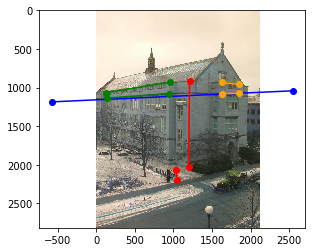

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(inp_img)
plt.plot([van_pt[0][0], van_pt[1][0]],[van_pt[0][1], van_pt[1][1]], color = 'blue', marker = 'o')
plt.plot([obj1[0][0], obj1[1][0]],[obj1[0][1], obj1[1][1]],color = 'red', marker = 'o', markerfacecolor ='red')
plt.plot([obj2[0][0], obj2[1][0]],[obj2[0][1], obj2[1][1]],color = 'red', marker = 'o', markerfacecolor ='red')
plt.plot([pt_v[0][0], pt_v[1][0]],[pt_v[0][1], pt_v[1][1]],color = 'green', marker = 'o', markerfacecolor ='green')
plt.plot([pt_v[2][0], pt_v[3][0]],[pt_v[2][1], pt_v[3][1]],color = 'green', marker = 'o', markerfacecolor ='green')
plt.plot([pt_v[4][0], pt_v[5][0]],[pt_v[4][1], pt_v[5][1]],color = 'orange', marker = 'o', markerfacecolor ='orange')
plt.plot([pt_v[6][0], pt_v[7][0]],[pt_v[6][1], pt_v[7][1]],color = 'orange', marker = 'o', markerfacecolor ='orange')
plt.show()